# Projeto com Feedback 04
### Rosane Moreira Barbosa
# Prevendo Customer Churn em Operadoras de Telecom

#### Objetivo: 
Criar um modelo de aprendizagem de máquina para prever se um cliente cancelará o plano (Customer Churn), a probabilidade de isso ocorrer e analisar os fatores que afetam as decisões dos clientes.

##### Descrição dos dados

1.	"state", string. Código de 2 letras do estado de residência do cliente nos EUA
2.	"account_length", numérico. Número de meses que o cliente está com o provedor de telecomunicações atual
3.	"area_code", string = "area_code_AAA" onde AAA = código de área de 3 dígitos.
4.	"international_plan", (sim / não). O cliente possui plano internacional.
5.	"voice_mail_plan", (sim / não). O cliente possui plano de correio de voz.
6.	"number_vmail_messages", numérico. Número de mensagens de correio de voz.
7.	"total_day_minutes", numérico. Total de minutos de chamadas diárias.
8.	"total_day_calls", numérico. Total de chamadas diárias.
9.	"total_day_charge", numérico. Cobrança total das chamadas diurnas.
10.	"total_eve_minutes", numérico. Total de minutos de ligações tarde/noite.
11.	"total_eve_calls", numérico. Número total de chamadas tarde/noite.
12.	"total_eve_charge", numérico. Cobrança total das chamadas tarde/noite.
13.	"total_night_minutes", numérico. Total de minutos de chamadas noturnas.
14.	"total_night_calls", numérico. Número total de chamadas noturnas.
15.	"total_night_charge ", numérico. Cobrança total das chamadas noturnas.
16.	"total_intl_minutes", numérico. Total de minutos de chamadas internacionais.
17.	"total_intl_calls", numérico. Número total de chamadas internacionais.
18.	"total_intl_charge", numérico. Custo total de chamadas internacionais
19.	"number_customer_service_calls", numérico. Número de ligações para atendimento ao cliente
20.	"churn", (sim / não). Cliente churn - variável alvo.

## 1. Carregando os Dados

In [1]:
# Carregando os dados de treino e de teste
from pandas import read_csv
dados = read_csv('projeto4_telecom_treino.csv')

Visualizando o shape (quantidade de linhas e colunas) dos dados.

In [2]:
# Shape dos dados (o arquivo tem 3333 registros e 21 variáveis/atributos)
dados.shape

(3333, 21)

Visualizando as 10 primeiras linhas dos dados

In [3]:
dados.head(10)

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
5,6,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,no
6,7,MA,121,area_code_510,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
7,8,MO,147,area_code_415,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
8,9,LA,117,area_code_408,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
9,10,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no


Verificando se há valores missing (ausentes)

In [4]:
dados.isnull().sum()

Unnamed: 0                       0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Visualizando a estrutura dos dados

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     3333 non-null   int64  
 1   state                          3333 non-null   object 
 2   account_length                 3333 non-null   int64  
 3   area_code                      3333 non-null   object 
 4   international_plan             3333 non-null   object 
 5   voice_mail_plan                3333 non-null   object 
 6   number_vmail_messages          3333 non-null   int64  
 7   total_day_minutes              3333 non-null   float64
 8   total_day_calls                3333 non-null   int64  
 9   total_day_charge               3333 non-null   float64
 10  total_eve_minutes              3333 non-null   float64
 11  total_eve_calls                3333 non-null   int64  
 12  total_eve_charge               3333 non-null   f

Indexando os dados pela variável 'Unnamed: 0' 

In [6]:
dados.index = dados['Unnamed: 0']
del dados['Unnamed: 0']

In [7]:
# Visualizando as 5 primeiras linhas
dados.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [8]:
# 5 últimas linhas dos dados
dados.tail()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
3329,AZ,192,area_code_415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,no
3330,WV,68,area_code_415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,no
3331,RI,28,area_code_510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,no
3332,CT,184,area_code_510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,no
3333,TN,74,area_code_415,no,yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,no


## 2. Análise Exploratória dos Dados

### 2.1 Estatística Descritiva

Apresentando o resumo estatístico descritivo das variáveis quantitativas numéricas.

In [9]:
dados.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Conforme pode ser observado no resumo acima, os valores da média e mediana são muito próximos com exceção de 4 variáveis. Assim, a seguir, verificaremos o Skew (assimetria) das variáveis numéricas.

In [10]:
# Skew de cada atributo
dados.skew()

account_length                   0.096606
number_vmail_messages            1.264824
total_day_minutes               -0.029077
total_day_calls                 -0.111787
total_day_charge                -0.029083
total_eve_minutes               -0.023877
total_eve_calls                 -0.055563
total_eve_charge                -0.023858
total_night_minutes              0.008921
total_night_calls                0.032500
total_night_charge               0.008886
total_intl_minutes              -0.245136
total_intl_calls                 1.321478
total_intl_charge               -0.245287
number_customer_service_calls    1.091359
dtype: float64

Verificando o total de valores únicos por coluna

In [11]:
dados.nunique()

state                              51
account_length                    212
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              46
total_day_minutes                1667
total_day_calls                   119
total_day_charge                 1667
total_eve_minutes                1611
total_eve_calls                   123
total_eve_charge                 1440
total_night_minutes              1591
total_night_calls                 120
total_night_charge                933
total_intl_minutes                162
total_intl_calls                   21
total_intl_charge                 162
number_customer_service_calls      10
churn                               2
dtype: int64

Observamos que a distribuição da variável 'churn' é desbalanceada.

In [12]:
dados.groupby('churn').size()

churn
no     2850
yes     483
dtype: int64

### 2.2 Visualização Gráfica

In [13]:
# Importando os módulos gráficos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Criando uma lista com as variáveis quantitativas numéricas

In [14]:
# criando uma variável com os nomes das colunas
colunas = dados.columns

# criando uma lista para guardar as colunas do tipo numérica
colunas_num = [col for col in colunas if (dados[col].dtype == 'float64' or dados[col].dtype == 'int64')]

De acordo com os histogramas abaixos, conforme verificado com a função Skew observa-se que as variáveis têm distribuição simétrica com exceção das variáveis 'number_vmail_messages', 'total_intl_calls' e 'number_customer_service_calls'.

[]

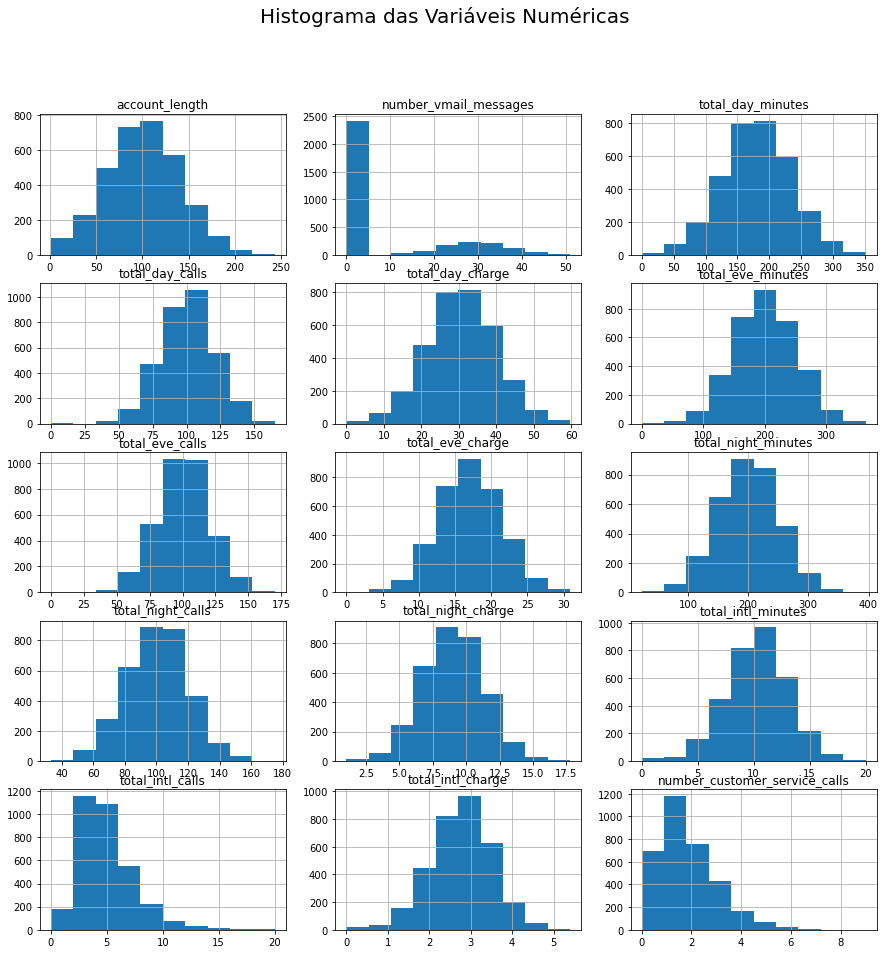

In [15]:
# Histograma

fig, axes = plt.subplots(5, 3, figsize = (15, 15))

title =fig.suptitle('Histograma das Variáveis Numéricas', fontsize = 20)

c = 0
for i in range(5):
    for j in range(3):
        dados[colunas_num[c]].hist(ax = axes[i,j]).set(title = colunas_num[c])
        c+=1
        
plt.plot()

O gráfico abaixo apresenta a quantidade de clientes por número de anos que mantém a conta com o provedor de telecomunicação. Verifica-se que mais de 100 clientes mantém conta com o provedor de 3 até 14 anos enquanto que menos de 100 clientes mantém conta até 2 anos e há mais de 15 anos.

Text(0, 0.5, 'Quantidade de Clientes')

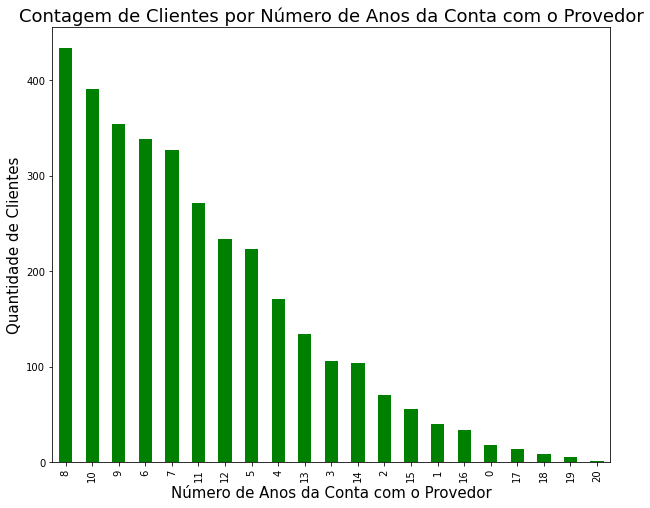

In [16]:
# Gráfico da quantidade de clientes pelo número de anos que o cliente está com o provedor de telecomunicações atual 

account_years = round(dados['account_length']/12, 0).astype(int)
account_years = account_years.value_counts()

plt.figure(figsize=(10, 8))
account_years.plot(kind='bar', color = 'green')

plt.title("Contagem de Clientes por Número de Anos da Conta com o Provedor", fontsize=18)
plt.xlabel('Número de Anos da Conta com o Provedor', fontsize=15)
plt.ylabel('Quantidade de Clientes', fontsize=15)

De acordo com o gráfico da quantidade de clientes por estado, abaixo, não é observado um padrão no churn (cancelamento) por estado. Os estados que apresentam um maior churn em relação a quantidade de clientes por estado foram os seguintes: Califórnia(CA), New Jersey(NJ), South Carolina(SC), Texas(TX) e Maryland(MD).

Text(8.750651041666671, 0.5, 'Quantidade de Clientes')

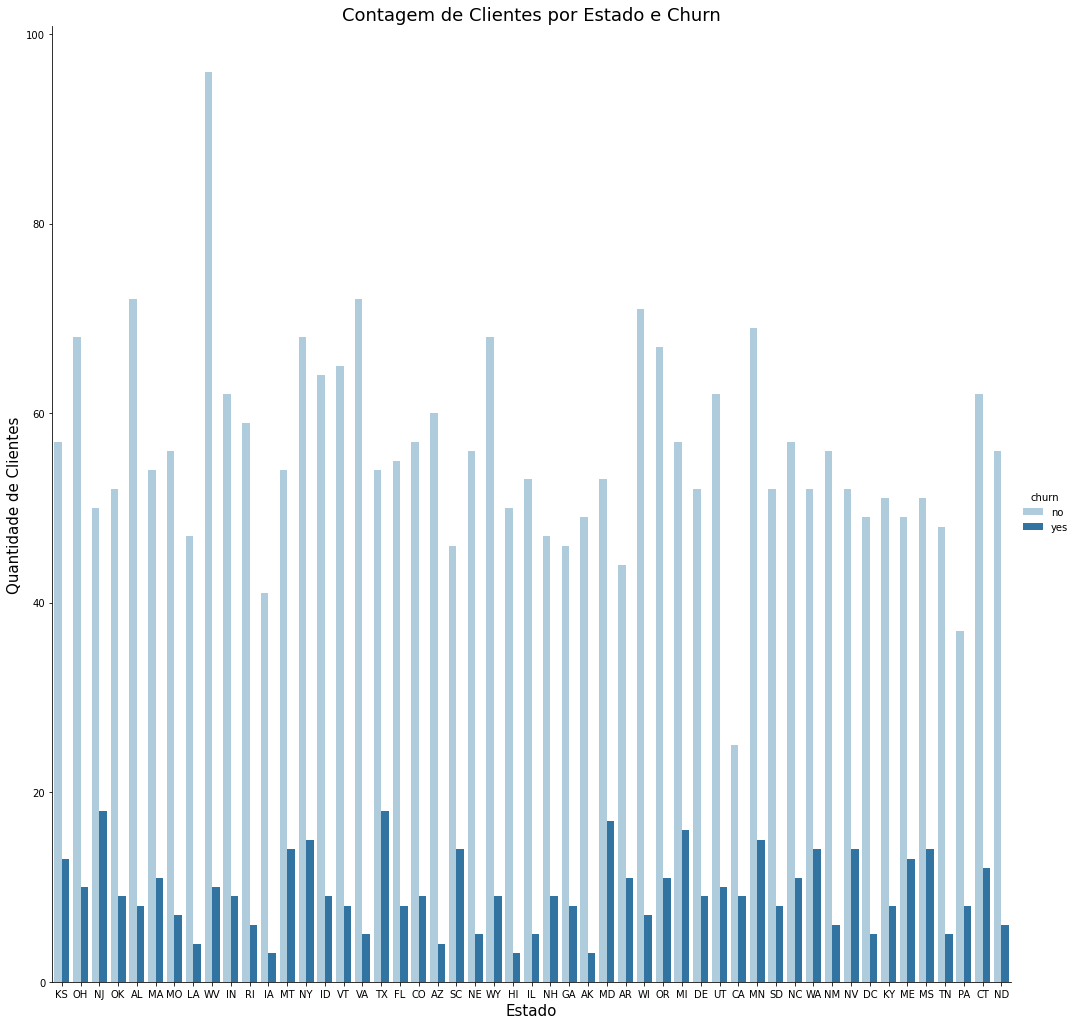

In [17]:
# Gráfico de barras da variável categórica 'state' discriminando pela variável target Churn

sns.catplot(x = 'state', kind = 'count', hue = 'churn', data = dados, palette = 'Paired', height=14, aspect=1)
plt.title("Contagem de Clientes por Estado e Churn", fontsize=18)
plt.xlabel('Estado', fontsize=15)
plt.ylabel('Quantidade de Clientes', fontsize=15)

No gráfico abaixo da quantidade de clientes por código de área observa-se que embora tenha ocorrido mais churn na area_code_415 do que nas demais,
o churn representa aproximadamente 17% em relação aos clientes 'no' churn em cada área.

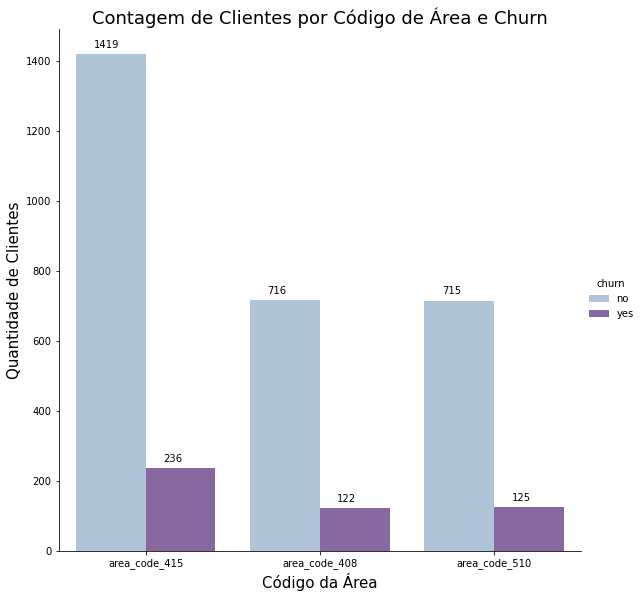

In [18]:
# Gráfico de barras da variável categórica 'area_code' discriminando pela variável target Churn

g = sns.catplot(x = 'area_code', kind = 'count', hue = 'churn', data = dados, palette = 'BuPu', height=8, aspect=1)
plt.title("Contagem de Clientes por Código de Área e Churn", fontsize=18)
plt.xlabel('Código da Área', fontsize=15)
plt.ylabel('Quantidade de Clientes', fontsize=15)

# to get the counts on the top heads of the bar
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+20))
    
plt.show()

Pela análise gráfica da quantidade de clientes por plano internacional, abaixo, verifica-se que o churn dos clientes que possuem plano internacional é de 74%. O churn dos clientes que não possuem plano internacional é de 13%, mas esse grupo tem uma massa de clientes muito maior que o grupo de clientes com plano internacional.

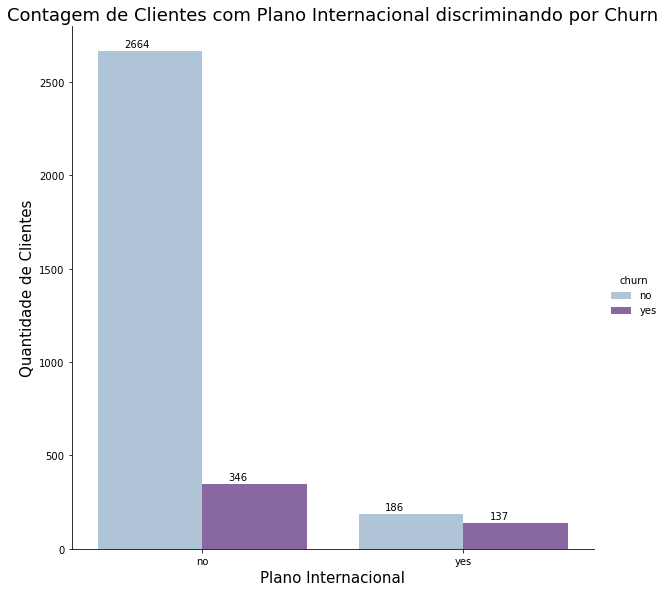

In [19]:
# Gráfico de barras da variável categórica 'international_plan' discriminando pela variável target Churn

g = sns.catplot(x = 'international_plan', kind = 'count', hue = 'churn', data = dados, palette = 'BuPu', height=8, aspect=1)
plt.title("Contagem de Clientes com Plano Internacional discriminando por Churn", fontsize=18)
plt.xlabel('Plano Internacional', fontsize=15)
plt.ylabel('Quantidade de Clientes', fontsize=15)

# to get the counts on the top heads of the bar
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+20))
    
plt.show()

No gráfico abaixo, observa-se que a maioria dos clientes não tem plano de correio de voz e a taxa de cancelamento (churn) desses clientes é baixa (aproximadamente 17%). O churn dos clientes que possuem o plano de correio de voz é menor (aproximadamente 9%).

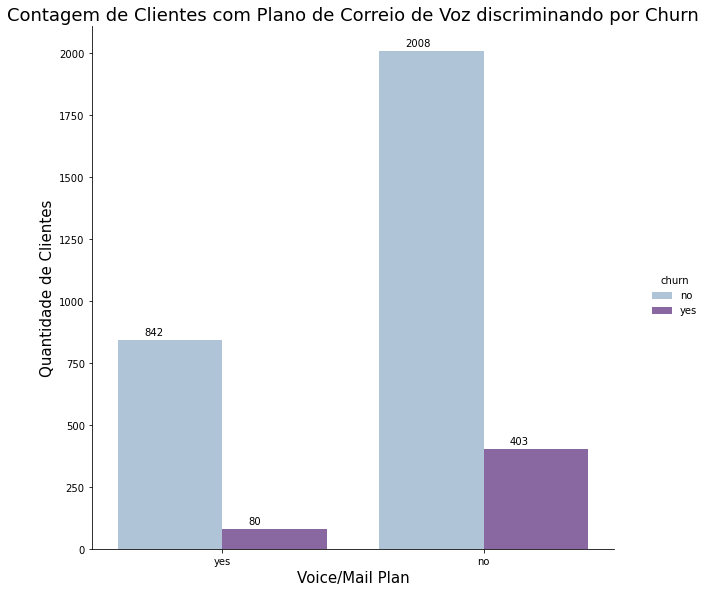

In [20]:
# Gráfico de barras da variável categórica 'voice_mail_plan' discriminando pela variável target Churn

g = sns.catplot(x = 'voice_mail_plan', kind = 'count', hue = 'churn', data = dados, palette = 'BuPu', height=8, aspect=1)
plt.title("Contagem de Clientes com Plano de Correio de Voz discriminando por Churn", fontsize=18)
plt.xlabel('Voice/Mail Plan', fontsize=15)
plt.ylabel('Quantidade de Clientes', fontsize=15)

# to get the counts on the top heads of the bar
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+20))
    
plt.show()

A seguir, observa-se no gráfico da quantidade de ligações de atendimento ao cliente, que a grande maioria dos clientes que não cancelam (no churn) fazem poucas (até 3) ligações para o serviço de atendimento ao cliente.

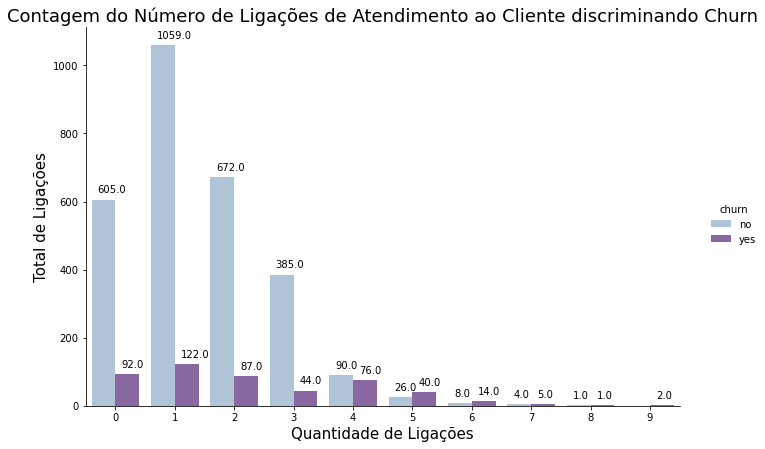

In [21]:
# Gráfico de barras da variável categórica "number_customer_service_calls" discriminando pela variável target Churn

g = sns.catplot(x="number_customer_service_calls", hue = 'churn', data=dados, kind="count", palette="BuPu", height=6, aspect=1.5)
plt.title("Contagem do Número de Ligações de Atendimento ao Cliente discriminando Churn", fontsize=18)
plt.xlabel('Quantidade de Ligações', fontsize=15)
plt.ylabel('Total de Ligações', fontsize=15)

# to get the counts on the top heads of the bar
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+20))
    
plt.show()

No diagrama (boxplot abaixo) verifica-se que existem vários outliers (valores extremos).

Text(0.5, 1.0, 'Boxplot')

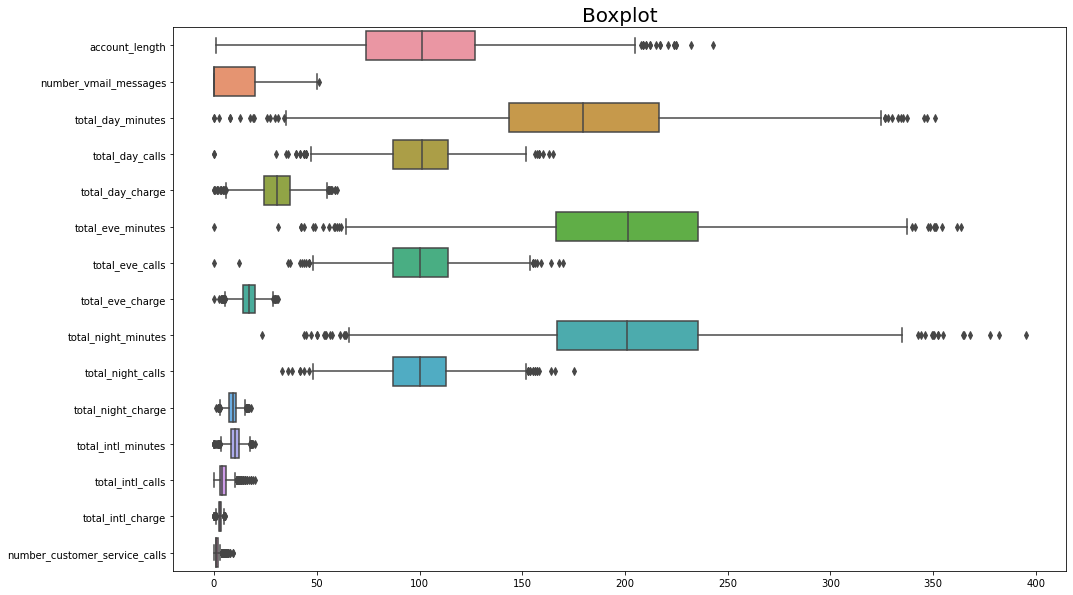

In [22]:
# Boxplot das variáveis quantitativas

fig, ax = plt.subplots(figsize = (16,10))
sns.boxplot(data = dados, orient = 'h')
plt.title('Boxplot', fontsize = 20)

No gráfico de correlação, a seguir, verifica-se que os pares de variáveis abaixo são fortemente correlacionadas entre si que indica colinearidade entre estes pares de variáveis e pode afetar o grau de acurácia do modelo.

- total_day_minutes e total_day_charge;
- total_eve_minutes e total_eve_charge;
- total_night_minutes e total_night_charge;
- total_intl_minutes e total_intl_charge.

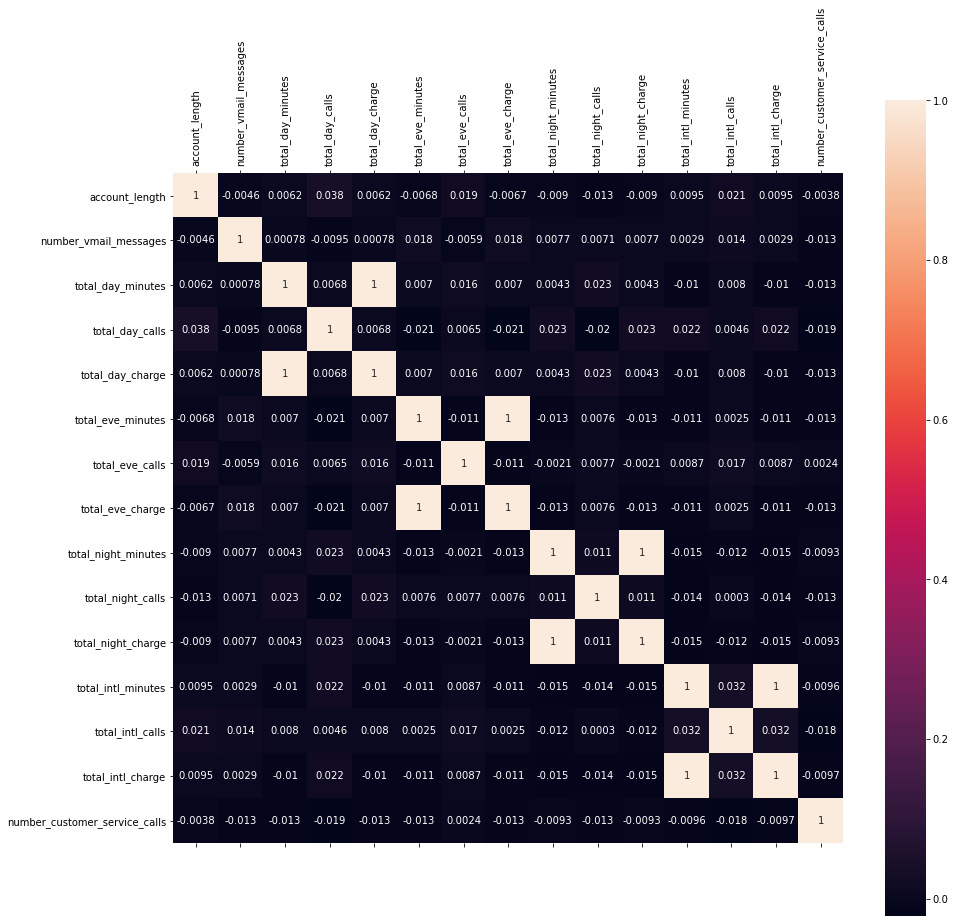

In [23]:
# Gráfico da Matriz de Correlações

correlations = dados.corr()
fig, ax = plt.subplots(figsize = (15,15))
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
ax = sns.heatmap(correlations, annot = True)

## 3. Pré-processamento dos Dados

In [24]:
# Cópia dos dados
treino = dados.copy()

### 3.1 Feature Engineering

Existem variáveis categóricas que precisam ser transformadas antes da aplicação dos modelos de machine learning.

In [25]:
# Extraindo os dígitos da variável categórica 'area_code'
treino['area_code'] = treino['area_code'].map(lambda x: int(x.lstrip('area_code')))

Definindo uma codificação (0/1) para as variáveis categóricas 'international_plan', 'voice_mail_plan' e 'churn'.

In [26]:
code = {'no':0, 'yes':1}

# Aplicando a codificação ao dataset
treino['churn'] = treino['churn'].map(code)
treino['international_plan'] = treino['international_plan'].map(code)
treino['voice_mail_plan'] = treino['voice_mail_plan'].map(code)

Visualizando as 10 primeiras linhas do dataset treino após a transformação das variáveis categóricas.

In [27]:
treino.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
1,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
2,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
3,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
5,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
6,AL,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
7,MA,121,510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
8,MO,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
9,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0


### 3.2 SMOTE (Synthetic Minority Over-sampling Technique)

No gráfico abaixo podemos visualizar o desequilíbrio da distribuição da variável churn (0 'no' e 1 'yes').

<AxesSubplot:title={'center':'Distribuição da Variável Churn'}>

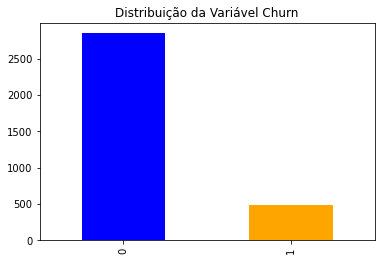

In [28]:
churn_count = treino['churn'].value_counts()
churn_count.plot(kind = 'bar', color = ['blue', 'orange'], title = 'Distribuição da Variável Churn')

Importando a função SMOTE para balancear a variável target churn

In [29]:
# Importando a função 
from imblearn.over_sampling import SMOTE

In [30]:
# Criando um array e separando o array em input (excluindo a variável 'state') e output
array = treino.values
X_treino = array[:, 1:19]
Y_treino = array[:, 19]

In [31]:
# Convertendo Y_treino para inteiro
Y_treino = Y_treino.astype(int)

In [32]:
# Definindo a semente para garantir a reprodução dos resultados
seed = 8

Aplicando a função SMOTE aos dados de treino

In [33]:
# Aplicando a função SMOTE
smt = SMOTE(random_state = seed)
X_treino_smt, Y_treino_smt = smt.fit_sample(X_treino, Y_treino)

Gráfico da distribuição da variável target (churn) após a aplicação da técnica de oversampling com SMOTE aos dados de treino para balancear a variável target (churn).

Text(0.5, 1.0, 'Distribuição da Variável Churn após o SMOTE')

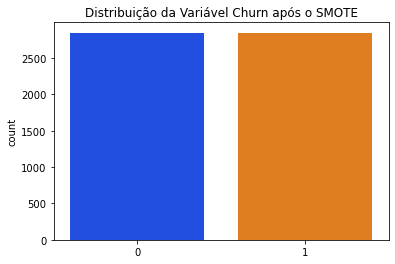

In [34]:
sns.countplot(Y_treino_smt, palette = 'bright')
plt.title('Distribuição da Variável Churn após o SMOTE', fontsize = 12)

### 3.3 Feature Selection

Na etapa de Feature Selection selecionamos os atributos (variáveis) que serão melhores candidatas a variáveis preditoras. O Feature Selection ajuda a reduzir o overfitting e reduz o tempo de treinamento.

### Eliminação Recursiva de Atributos (RFE)

In [35]:
# Importando os módulos para a técnica de eliminação recursiva de atributos com o algoritmo de Regressão Logística

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Criando o modelo
modelo = LogisticRegression()

In [37]:
# RFE
rfe = RFE(modelo, 5)
fit = rfe.fit(X_treino_smt, Y_treino_smt)

In [38]:
# Print dos resultados
print("Variáveis Preditoras:", treino.columns[1:19])
print("Variáveis Selecionadas: %s" % fit.support_)
print("Ranking dos Atributos: %s" % fit.ranking_)
print("Número de Melhores Atributos: %d" % fit.n_features_)

Variáveis Preditoras: Index(['account_length', 'area_code', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls'],
      dtype='object')
Variáveis Selecionadas: [False False  True  True False  True False False False False False False
 False False False  True False  True]
Ranking dos Atributos: [12  5  1  1  4  1  7 10  8  6 13 14  9 11  2  1  3  1]
Número de Melhores Atributos: 5


Empregando RFE as 5 variáveis selecionadas foram as seguintes: 'international_plan', 'voice_mail_plan', 'total_intl_minutes', 'total_intl_calls' e 'number_customer_service_calls'

## 4. Construção dos Modelos Preditivos usando Cross Validation

In [39]:
# Importando os algoritmos
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [40]:
# Definindo os valores para os folds
num_folds = 10

In [41]:
# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('SVM', SVC()))

Selecionando as variáveis mais significativas obtidas pela técnica de Feature Selection. 

In [42]:
# Criando um vetor com as variáveis selecionadas
var_selection = [2, 3, 5, 15, 17]
X_treino_smt_selection = X_treino_smt[:, var_selection]

LR: 0.730526 (0.022525)
LDA: 0.727719 (0.023795)
NB: 0.759649 (0.035350)
CART: 0.894912 (0.036854)
KNN: 0.754386 (0.017874)
SVM: 0.636316 (0.220007)


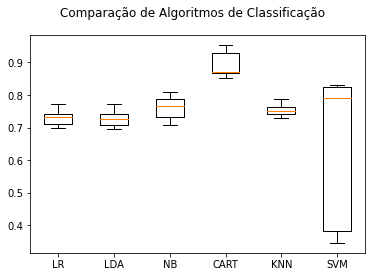

In [43]:
# Loop com as métricas de avaliação de cada modelo
resultados_selection = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds)
    cv_acuracia = cross_val_score(modelo, X_treino_smt_selection, Y_treino_smt, cv = kfold, scoring = 'accuracy')
    resultados_selection.append(cv_acuracia)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_acuracia.mean(), cv_acuracia.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados_selection)
ax.set_xticklabels(nomes)
plt.show()

Comparando os algoritmos verifica-se que o modelo de Decision Tree Classifier (CART) apresentou a maior acurácia.

O algoritmo SVM apresentou um desvio padrão mais elevado do que os demais, provavelmente o resultado do SVM foi afetado pela escala dos dados. Os algoritmos SVM, KNN bem como a Regressão Logística requerem que os dados estejam normalizados em uma mesma escala.

### Modelos Preditivos com Dados Normalizados

In [44]:
from sklearn.preprocessing import MinMaxScaler

LR: 0.728596 (0.024898)
LDA: 0.727719 (0.023795)
NB: 0.759649 (0.035350)
CART: 0.894912 (0.036854)
KNN: 0.867368 (0.012435)
SVM: 0.836667 (0.018002)


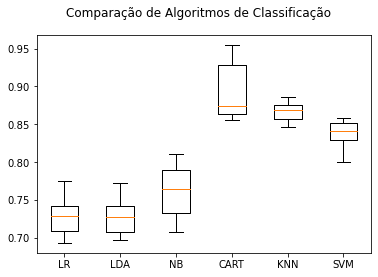

In [45]:
# Loop com as métricas de avaliação de cada modelo
resultados_selection = []
nomes = []

# Normalizando os dados
scaler = MinMaxScaler(feature_range = (0, 1))
X_treino_smt_scaled = scaler.fit_transform(X_treino_smt_selection)

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds)
    cv_acuracia = cross_val_score(modelo, X_treino_smt_scaled, Y_treino_smt, cv = kfold, scoring = 'accuracy')
    resultados_selection.append(cv_acuracia)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_acuracia.mean(), cv_acuracia.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados_selection)
ax.set_xticklabels(nomes)
plt.show()

A normalização dos dados melhorou a acurácia dos algoritmos KNN e SVM e afetou pouco a acurácia da Regressão Logística.

O algoritmo CART continua apresentando a melhor acurácia dentre todos os modelos gerados.

## 5. Otimização do Modelo - Ajuste de Hyperparâmetros

### Grid Search Parameter Tuning

Usando o método Grid Search Parameter Tuning para encontrar os melhores hiperparâmetros a fim de ajustar o algoritmo CART que apresentou a melhor performance dentre todos os algoritmos.

#### Utilizaremos os dados originais sem normalização pois o algoritmo Decision Tree Classifier (CART) é invariante a escala dos dados.

In [46]:
# Importando o método Grid Search Parameter
from sklearn.model_selection import GridSearchCV

In [47]:
# Criando o modelo
modelo = DecisionTreeClassifier(random_state = seed)

In [48]:
# Definindo os valores dos hiperparâmetros para o grid
valores_grid = [{'max_depth': [4, 5, 6], 'max_features': [0.4, 0.6, 0.8], 'min_samples_leaf': [0.02, 0.06, 1.0]}]

In [49]:
# Criando o grid
grid = GridSearchCV(estimator = modelo, scoring='accuracy', param_grid = valores_grid, cv=10, n_jobs = -1)
gs_cart = grid.fit(X_treino_smt, Y_treino_smt)

In [50]:
# Print do resultado
print("Acurácia: %.3f" % (gs_cart.best_score_ * 100))
print("Melhor Modelo:\n", gs_cart.best_estimator_)
print("Melhores Parâmetros:\n", gs_cart.best_params_)

Acurácia: 89.000
Melhor Modelo:
 DecisionTreeClassifier(max_depth=5, max_features=0.6, min_samples_leaf=0.02,
                       random_state=8)
Melhores Parâmetros:
 {'max_depth': 5, 'max_features': 0.6, 'min_samples_leaf': 0.02}


In [51]:
# Melhor modelo extraído do grid
best_model = gs_cart.best_estimator_

### Conclusão:

O algoritmo Decision Tree Classifier (CART) com os hyperparâmetros default apresentou a melhor performance dentre os algoritmos aplicados aos dados.

## 6. Previsão do Modelo Selecionado com os Dados de Teste

### 6.1 Carregando os Dados de Teste

In [52]:
teste = read_csv('projeto4_telecom_teste.csv')

In [53]:
# Verificando o shape
teste.shape

(1667, 21)

In [54]:
# Visualizando as 10 primeiras linhas
teste.head(10)

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,HI,101,area_code_510,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,2,MT,137,area_code_510,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,4,NM,99,area_code_415,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,5,SC,108,area_code_415,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no
5,6,IA,117,area_code_415,no,no,0,226.5,85,38.51,...,68,12.04,223.0,90,10.04,6.9,5,1.86,1,no
6,7,ND,63,area_code_415,no,yes,32,218.9,124,37.21,...,125,18.22,260.3,120,11.71,12.9,3,3.48,1,no
7,8,LA,94,area_code_408,no,no,0,157.5,97,26.78,...,112,19.08,310.8,106,13.99,11.1,6,3.00,0,no
8,9,MO,138,area_code_510,no,no,0,89.1,117,15.15,...,46,10.78,190.5,71,8.57,9.9,4,2.67,2,no
9,10,TX,128,area_code_415,no,yes,43,177.8,100,30.23,...,89,12.52,194.2,92,8.74,11.9,1,3.21,0,no


### 6.2 Pré-processamento dos Dados de Teste

Indexando os dados pela variável 'Unnamed: 0' e excluindo esta coluna.

In [55]:
teste.index = teste['Unnamed: 0']
del teste['Unnamed: 0']

Extraindo os dígitos da variável 'area_code'

In [56]:
teste['area_code'] = teste['area_code'].map(lambda x: int(x.lstrip('area_code')))

Definindo uma codificação (0/1) para as variáveis categóricas 'international_plan', 'voice_mail_plan' e 'churn'.

In [57]:
code = {'no':0, 'yes':1}

# Aplicando a codificação ao dataset de teste
teste['churn'] = teste['churn'].map(code)
teste['international_plan'] = teste['international_plan'].map(code)
teste['voice_mail_plan'] = teste['voice_mail_plan'].map(code)

In [58]:
# Visualizando as 10 primeiras linhas do dataset de teste após a transformação das variáveis string
teste.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
1,HI,101,510,0,0,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0
2,MT,137,510,0,0,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0
3,OH,103,408,0,1,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0
4,NM,99,415,0,0,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0
5,SC,108,415,0,0,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0
6,IA,117,415,0,0,0,226.5,85,38.51,141.6,68,12.04,223.0,90,10.04,6.9,5,1.86,1,0
7,ND,63,415,0,1,32,218.9,124,37.21,214.3,125,18.22,260.3,120,11.71,12.9,3,3.48,1,0
8,LA,94,408,0,0,0,157.5,97,26.78,224.5,112,19.08,310.8,106,13.99,11.1,6,3.00,0,0
9,MO,138,510,0,0,0,89.1,117,15.15,126.8,46,10.78,190.5,71,8.57,9.9,4,2.67,2,0


### 6.3 Previsão com o Modelo de Melhor Performance (CART) aplicado aos Dados de Teste

In [59]:
# Importando as métricas de avaliação
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [60]:
# Criando um array e separando o array em input (excluindo a variável 'state') e output
array = teste.values
X_teste = array[:, 1:19]
Y_teste = array[:, 19]

In [61]:
# Convertendo Y_teste para inteiro
Y_teste = Y_teste.astype(int)

In [62]:
# Previsão do melhor modelo com os dados de teste
Y_pred_teste = best_model.predict(X_teste)
pred_teste = [round(value) for value in Y_pred_teste]
prob_teste = best_model.predict_proba(X_teste)

Acurácia: 91.542%

AUC: 0.901

Confusion Matrix:
 [[1355   88]
 [  53  171]]


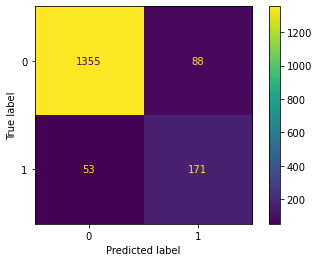

In [63]:
# Avaliação das previsões com os dados de teste

acuracia = accuracy_score(Y_teste, pred_teste)
print("Acurácia: %.3f%%" % (acuracia * 100))

auc = roc_auc_score(Y_teste, prob_teste[:, 1])
print('\nAUC: %.3f' % auc)

conf_mat = confusion_matrix(Y_teste, pred_teste)
print('\nConfusion Matrix:\n', conf_mat)

plot_confusion_matrix(best_model, X_teste, Y_teste)
plt.show()

### Considerações Finais:

- A acurácia do modelo CART com os dados de teste (91.542%) ficou próxima da acurácia com os dados de treino (89%);

- A métrica AUC obtida com o modelo CART apresentou um score alto de 0.9 que indica uma boa performance.

Gerando o dataframe com as previsões e a probabilidade da variável target 'churn'

In [64]:
import pandas as pd
df_previsao = pd.DataFrame([pred_teste, prob_teste[:,1]]).T
df_previsao.columns = ['Churn_Code', 'Probabilidade']

In [65]:
# Acrescentando a coluna Churn no/yes
code = {0:'no', 1:'yes'}
df_previsao['Churn'] = df_previsao['Churn_Code'].map(code)

In [66]:
# Visualizando
df_previsao.head(10)

,Churn_Code,Probabilidade,Churn
0,0.0,0.217158,no
1,0.0,0.095398,no
2,0.0,0.254386,no
3,0.0,0.095398,no
4,0.0,0.095398,no
5,0.0,0.135678,no
6,0.0,0.095398,no
7,0.0,0.095398,no
8,0.0,0.095398,no
9,0.0,0.095398,no


In [67]:
# Distribuição da previsão
df_previsao.groupby('Churn').size()

Churn
no     1408
yes     259
dtype: int64

### Fim